In [1]:
using JuMP

# Solution 1: Stigler's Diet
George Stigler published a paper investigating the composition of an optimal diet; minimizing total cost while meeting the recommended daily allowance (RDA) of several nutrients. To answer this question, Stigler tabulated a list of 77 foods and their nutrient content for 9 nutrients: calories, protein, calcium, iron, vitamin A, thiamine, riboflavin, niacin, and ascorbic acid.

In [68]:
# using the ipython file provided in the homework

using NamedArrays      # make sure you run Pkg.add("NamedArrays") first!

# import Stigler's data set
raw = readcsv("/Users/spidy/Documents/CS524/stigler.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );

<b><u>Solution 1a:</u></b> Formulate Stigler’s diet problem as an LP and solve it. First converting the Array to real so that we can
have a vector comparison done without any issues. 
Formulating into the form Ax >= b and solving for x:

In [90]:
data_matrix = convert(Array{Real, 2}, data)'
lower_b_val = [lower[elem] for elem in nutrients]
m1 = Model()
@variable(m1, x[1:length(n_foods)] >= 0)
@constraint(m1, data_matrix * x .>= lower_b_val)
@objective(m1, Min, sum(x))
status = solve(m1)
per_day_elem_val = getvalue(x)
per_day_cost = getobjectivevalue(m1);

Calculating the nutrients cost per year based on the per_day_cost calculated before and doing a total to get the per year cost. Sum of all the cost is equal to the minimum cost we calculated as objective. 

<b>How does your cheapest diet compare in annual cost to Stigler’s?</b>

The minimum cost calculated using the objective function is 39.66USD per year as compared to 39.93USD (Stigler's) cost per year.

<b>What foods make up your optimal diet?</b>
The elements that make up the optimal diet are the ones for which the xi value was not zero i.e.
<br>Wheat Flour (Enriched)
<br>Liver (Beef)
<br>Cabbage
<br>Spinach and
<br>Navy Beans, Dried

In [91]:
total_cost = 0
for i in 1:length(per_day_elem_val)
    if (per_day_elem_val[i] != 0)
        total_cost += 365 * per_day_elem_val[i]
        @printf("%25s: %10f USD\n", foods[i], 365 * per_day_elem_val[i])
    end
end
@printf("-----------------------------------------\n")
@printf("%26s %10f USD\n", "SUM of cost(per_year):", total_cost)
@printf("\n")
@printf("%26s %10f USD\n", "TOTAL (per year):", 365 * per_day_cost)

   Wheat Flour (Enriched):  10.774458 USD
             Liver (Beef):   0.690783 USD
                  Cabbage:   4.093269 USD
                  Spinach:   1.827796 USD
        Navy Beans, Dried:  22.275426 USD
-----------------------------------------
    SUM of cost(per_year):  39.661732 USD

         TOTAL (per year):  39.661732 USD


<b><u>Solution 1b:</u></b> In the above solution, the two food items - Wheat Flour(Enriched) and Liver (Beef) cannot be counted in Vegan and Gluten Free (GF). Need to add constraints to make sure these are not counted in Vegan and GF.
The below solution will be very similar to the above one but with more constraints i.e. for all non vegan and GF we will have to add constraints where x (for all non GF & Vegan) will be equal to zero. 

In [95]:
m1b = Model()
@variable(m1b, x[1:length(n_foods)] >= 0)
@constraint(m1b, data_matrix * x .>= lower_b_val)
@constraint(m1b, x[1] == 0)   # Adding constraint for Wheat (non GF)
@constraint(m1b, x[30] == 0)  # # Adding constraint for Liver (Beefs) -- not Vegan
@objective(m1b, Min, sum(x))
status = solve(m1b)
per_day_elem_val = getvalue(x)
per_day_cost = getobjectivevalue(m1b);

In [96]:
total_cost = 0
for i in 1:length(per_day_elem_val)
    if (per_day_elem_val[i] != 0)
        total_cost += 365 * per_day_elem_val[i]
        @printf("%25s: %10f USD\n", foods[i], 365 * per_day_elem_val[i])
    end
end
@printf("-----------------------------------------\n")
@printf("%26s %10f USD\n", "SUM of cost:", total_cost)
@printf("\n")
@printf("%26s %10f USD\n", "TOTAL:", 365 * per_day_cost)

                     Lard:   1.317325 USD
                  Cabbage:   4.095669 USD
                  Spinach:   1.954756 USD
        Navy Beans, Dried:  38.188423 USD
-----------------------------------------
              SUM of cost:  45.556173 USD

                    TOTAL:  45.556173 USD


Lard is pig's fat as per Wikipedia and cannot be considered as Vegan. Hence adding another constraint to the above solution. 

In [98]:
m1b = Model()
@variable(m1b, x[1:length(n_foods)] >= 0)
@constraint(m1b, data_matrix * x .>= lower_b_val)
@constraint(m1b, x[1] == 0)  # Adding constraint for Wheat (non GF)
@constraint(m1b, x[30] == 0) # Adding constraint for Liver (Beefs) -- not Vegan
@constraint(m1b, x[24] == 0) # Adding constraint for Lard -- not Vegan

@objective(m1b, Min, sum(x))
status = solve(m1b)
per_day_elem_val = getvalue(x)
per_day_cost = getobjectivevalue(m1b);
total_cost = 0
for i in 1:length(per_day_elem_val)
    if (per_day_elem_val[i] != 0)
        total_cost += 365 * per_day_elem_val[i]
        @printf("%25s: %10f USD\n", foods[i], 365 * per_day_elem_val[i])
    end
end
@printf("-----------------------------------------\n")
@printf("%26s %10f USD\n", "SUM of cost:", total_cost)
@printf("\n")
@printf("%26s %10f USD\n", "TOTAL:", 365 * per_day_cost)

                Corn Meal:   1.950650 USD
                  Cabbage:   4.129334 USD
                  Spinach:   1.889148 USD
        Navy Beans, Dried:  37.619415 USD
-----------------------------------------
              SUM of cost:  45.588548 USD

                    TOTAL:  45.588548 USD


<b>Total optimal cost for Vegan and Glutten Free: </b> 45.588548 USD. 

<b>what foods would be used?</b> Please find below:
<br>Corn Meal
<br>Cabbage
<br>Spinach
<br>Navy Beans, Dried

# Solution 2: Construction with constraints

| |Month-1 | Month-2 | Month-3 | Month-4 | Total_Worker
|--------------|
|Project | PR-1 |PR-1 | PR-1 | -    | 8
|Project | PR-2 |PR-2 | PR-2 | PR-2 | 10
|Project | PR-3 |PR-3 |  -   | -    | 12
|Workers Available| 8 | 8 | 8 | 8 | -

<br> One more given constraint -  no more than 6 workers can work on a single job.

In [126]:
# Let the number of workers for Project1 be x1, x2, x3
# Let the number of workers for Project2 be y1, y2, y3, y4
# Let the number of workers for Project3 be z1, z2
m2 = Model()
@variable(m2, 0 <= x[1:3] <= 6) # Constraint that no more than 6 workers can work on a single job
@variable(m2, 0 <= y[1:4] <= 6) # Constraint that no more than 6 workers can work on a single job
@variable(m2, 0 <= z[1:2] <= 6) # Constraint that no more than 6 workers can work on a single job
@constraint(m2, (x[1] + y[1] + z[1]) <= 8) # Workers available per month - 8
@constraint(m2, (x[2] + y[2] + z[2]) <= 8)
@constraint(m2, (x[3] + y[3]) <= 8)
@constraint(m2, (y[4]) <= 8)
@constraint(m2, sum(x[1:3])  == 8)  
@constraint(m2, sum(y[1:4])  == 10)
@constraint(m2, sum(z[1:2])  == 12)
@objective(m2, Min, (sum(x[1:3]) + sum(y[1:4]) + sum(z[1:2])));

In [146]:
status = solve(m2)
x_val = getvalue(x)
y_val = getvalue(y)
z_val = getvalue(z)
getobjectivevalue(m2)
println("Workers required for Project-1 per month: ", Array{Int}(getvalue(x)))
println("Workers required for Project-2 per month: ", Array{Int}(getvalue(y)))
println("Workers required for Project-3 per month: ", Array{Int}(getvalue(z)))
println("Objective Function: ", getobjectivevalue(m2))

Workers required for Project-1 per month: [0,2,6]
Workers required for Project-2 per month: [2,0,2,6]
Workers required for Project-3 per month: [6,6]
Objective Function: 30.0


Looking at above solution it looks like all the projects can be completed on time. 

# Solution 3: Museum site planning.

In [10]:
A = [2 3; 3 -1; -1 0; 0 1; 0 -1];
b = [2100; 1500; 0; 500; 0]

using JuMP

m = Model()
@variable(m, r >= 0)           # radius
@variable(m, x1[1:2])           # coordinates of center

for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x1 + r*norm(A[i,:]) .<= b[i])
end

@objective(m, Max, r)     # maximize radius

status = solve(m)
center = getvalue(x1)
radius = getvalue(r)

println(status)
println("The coordinates of the Chebyshev center are: ", center)
println("The largest possible radius is: ", radius - 50)

Optimal
The coordinates of the Chebyshev center are: [244.029,244.029]
The largest possible radius is: 194.0285267938019


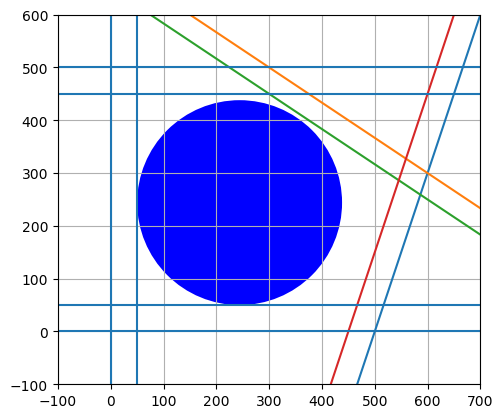

PyObject <matplotlib.patches.Circle object at 0x32a024950>

In [20]:
using PyCall
@pyimport matplotlib.patches as patch
using PyPlot
plt = PyPlot;
x = linspace(0, 700, 10)
y1 = 3x - 1500
y2 = -(2/3)x + 700
y3 = -(2/3)x + 650
y4 = 3x - 1350
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
ax = plt.gca()
ax[:set_xlim]((-100,700));
ax[:set_ylim]((-100, 600));
plt.axhline(y=500)
plt.axhline(y=450)
plt.axhline(y=0)
plt.axhline(y=50)
plt.axvline(x=0)
plt.axvline(x=50)
plt.grid("on")
ax[:set_aspect]("equal")
c = patch.Circle([244.029,244.029],194.029,fc="blue")
ax[:add_artist](c)

# Solution 4: Electricity Grid with Storage
The town of Hamilton buys its electricity from the Powerco utility, which charges for electricity on an hourly basis. If less than 50 MWh is used during a given hour, then the cost is 100 USD per MWh. Any excess beyond 50 MWh used during the hour is charged at the higher rate of 400 USD per MWh. The maximum power that Powerco can provide in any given hour is 75 MWh.

<b><u>Solution a:</u></b>
How much money can the town of Hamilton save per day thanks to the battery? Assume that the battery begins the day completely drained. Also, to be safe from possible black-outs, limit the amount of electricity purchased every hour to a maximum of 65 MWh.

In [15]:
# Given in the input question
demand = [43; 40; 36; 36; 35; 38; 41; 46; 49; 48; 47; 47; 48; 46; 45; 47; 50; 63; 75; 75; 72; 66; 57; 50;]
mod4 = Model()
@variable(mod4, 0 <= reg_usage[1:24] <= 50)
@variable(mod4, excess_usage[1:24] >= 0)
@variable(mod4, batt_bkup[1:25] <= 30)

# Assume that the battery begins the day completely drained.
@constraint(mod4, batt_bkup[1] == 0)

#  Also, to be safe from possible black-outs, limit the amount of electricity purchased every hour to a 
# maximum of 65 MWh.
@constraint(mod4, reg_usage + excess_usage + batt_bkup[1:24] .>= demand)
@constraint(mod4, reg_usage + excess_usage .<= 65)

# conservation of power (similar to Sailco example)
for i in 1:24
    @constraint(mod4, reg_usage[i] + excess_usage[i] + batt_bkup[i] == batt_bkup[i+1] + demand[i])
end

@constraint(mod4, batt_bkup .<= 30)
@objective(mod4, Min, 100 * sum(reg_usage) + 400 * sum(excess_usage))

solve(mod4)
power_purchased_per_hour = getvalue(reg_usage) + getvalue(excess_usage)
batt_storage_per_hour = getvalue(batt_bkup)
println("Regular power purchased per hour: ", Array{Int}(getvalue(reg_usage)))
println("Excess power purchased per hour: ", Array{Int}(getvalue(excess_usage)))
println("Batt Storage: ", Array{Int}(getvalue(batt_bkup)))

println("Objective Function: ", getobjectivevalue(mod4))

Regular power purchased per hour: [50,50,35,50,10,50,50,50,47,50,44,50,44,50,42,50,50,50,50,50,50,50,50,50]
Excess power purchased per hour: [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,13,15,15,15,7,0]
Batt Storage: [0,7,17,16,30,5,17,26,30,28,30,27,30,26,30,27,30,30,30,18,8,1,0,0,0]
Objective Function: 143400.0


In [16]:
# Cost without battery
cost = 0
for i in 1:24
    if demand[i] > 50
        cost += (demand[i] - 50) * 400 + (50 * 100)
    else
        cost += (demand[i] * 100)
    end
end
println("Cost without battery: ", cost)
println("Savings per day because of battery: ", cost - getobjectivevalue(mod4))

Cost without battery: 152400
Savings per day because of battery: 9000.0


<b><u>Solution b:</u></b> How much money would be saved if the battery had an infinite capacity? In this scenario, how
much of the battery’s capacity is actually used?

In [21]:
# Given in the input question
demand = [43; 40; 36; 36; 35; 38; 41; 46; 49; 48; 47; 47; 48; 46; 45; 47; 50; 63; 75; 75; 72; 66; 57; 50;]
mod4b = Model()
@variable(mod4b, 0 <= reg_usage[1:24] <= 50)
@variable(mod4b, excess_usage[1:24] >= 0)
# infinite battery capacity
@variable(mod4b, batt_bkup[1:25] >= 0)

# Assume that the battery begins the day completely drained.
@constraint(mod4b, batt_bkup[1] == 0)

@constraint(mod4b, reg_usage + excess_usage .<= 65)

# conservation of power (similar to Sailco example)
for i in 1:24
    @constraint(mod4b, reg_usage[i] + excess_usage[i] + batt_bkup[i] == batt_bkup[i+1] + demand[i])
end

@objective(mod4b, Min, 100 * sum(reg_usage) + 400 * sum(excess_usage))

solve(mod4b)
power_purchased_per_hour = getvalue(reg_usage) + getvalue(excess_usage)
batt_storage_per_hour = getvalue(batt_bkup)
println("Regular power purchased per hour: ", Array{Int}(getvalue(reg_usage)))
println("Excess power purchased per hour: ", Array{Int}(getvalue(excess_usage)))
println("Batt Storage: ", Array{Int}(getvalue(batt_bkup)))

println("Objective Function: ", getobjectivevalue(mod4b))
println("Savings: ", cost - getobjectivevalue(mod4b))

Regular power purchased per hour: [50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50]
Excess power purchased per hour: [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
Batt Storage: [0,7,17,31,45,60,72,81,85,86,88,91,94,96,100,105,108,108,95,70,45,23,7,0,0]
Objective Function: 120000.0
Savings: 32400.0


<b><u>Solution c:</u></b> Make a plot that shows (i) the typical energy demand vs time of day (ii) the electricity purchased using the strategy found in part a) vs time of day, and (iii) the battery capacity used as a function of time (draw all three plots on the same axes).

<b>Note</b>
<br>
<b>For (iii)</b> - I have plotted for only 24 hours and not 25entries because 25th entry was 0 as well. 

INFO: Precompiling module QuartzImageIO.


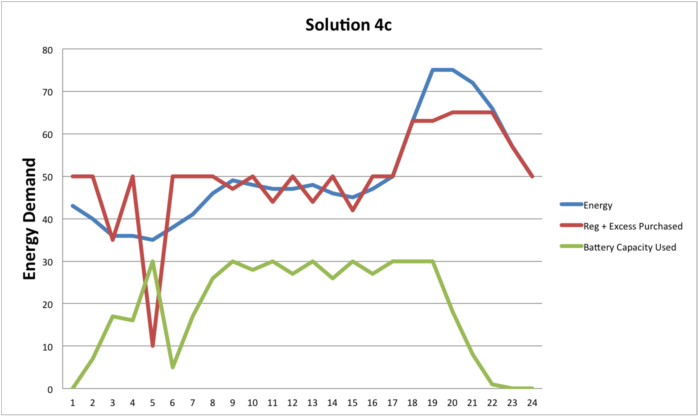

In [3]:
img = testimage("/Users/spidy/Documents/CS524/4c.png")

<b><u>Solution d</u></b> Comment on whether the solutions you found are unique. Are other solutions possible? Why? -- I think there are other solutions possible to this problem. The total savings/cost would be same but the distribution of battery backup can be across the day can be different. 
The solution with infinity backup at first didn't seem to be unique but later substituting different values of battery usage I was getting same answer w.r.t to cost so I believe we have a unique solution. 

Suggest a way of finding another optimal solution.
My best guess is to convert the program into a linear program of the type Ax <= b or Ax >= b and solve it to obtain the optimal solution with all the possible constraint from the problem. I would still say that the answer from cost/saving point of view would still be close to the solution obtained above.

